In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, plot_tree

In [5]:
df = pd.read_csv('./play-golf.csv')

In [6]:
df.head()

,Outlook,Temp,Humidity,Windy,PlayGolf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [7]:
X = df.drop('PlayGolf', axis = 'columns')
y = df['PlayGolf']

In [8]:
X.dtypes

Outlook     object
Temp        object
Humidity    object
Windy         bool
dtype: object

In [9]:
categorical_features_mask = np.array([np.issubdtype(dtype, np.object) for dtype in X.dtypes])

In [10]:
categorical_features_mask

array([ True,  True,  True, False])

In [11]:
encoder = OneHotEncoder()

In [12]:
preprocessor  = ColumnTransformer(
                    transformers = [('cat', encoder, categorical_features_mask)],
                    remainder = 'passthrough'
                )

In [13]:
classifier = DecisionTreeClassifier(random_state = 42, criterion = 'entropy')

In [14]:
pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', classifier)])

In [15]:
pipeline.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat', OneHotEncoder(),
                                                  array([ True,  True,  True, False]))])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', random_state=42))])

In [16]:
pipeline.predict(X)

array(['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes',
       'Yes', 'Yes', 'Yes', 'No'], dtype=object)

In [17]:
encoder.fit(X)
encoder.get_feature_names(X.columns)

array(['Outlook_Overcast', 'Outlook_Rainy', 'Outlook_Sunny', 'Temp_Cool',
       'Temp_Hot', 'Temp_Mild', 'Humidity_High', 'Humidity_Normal',
       'Windy_False', 'Windy_True'], dtype=object)

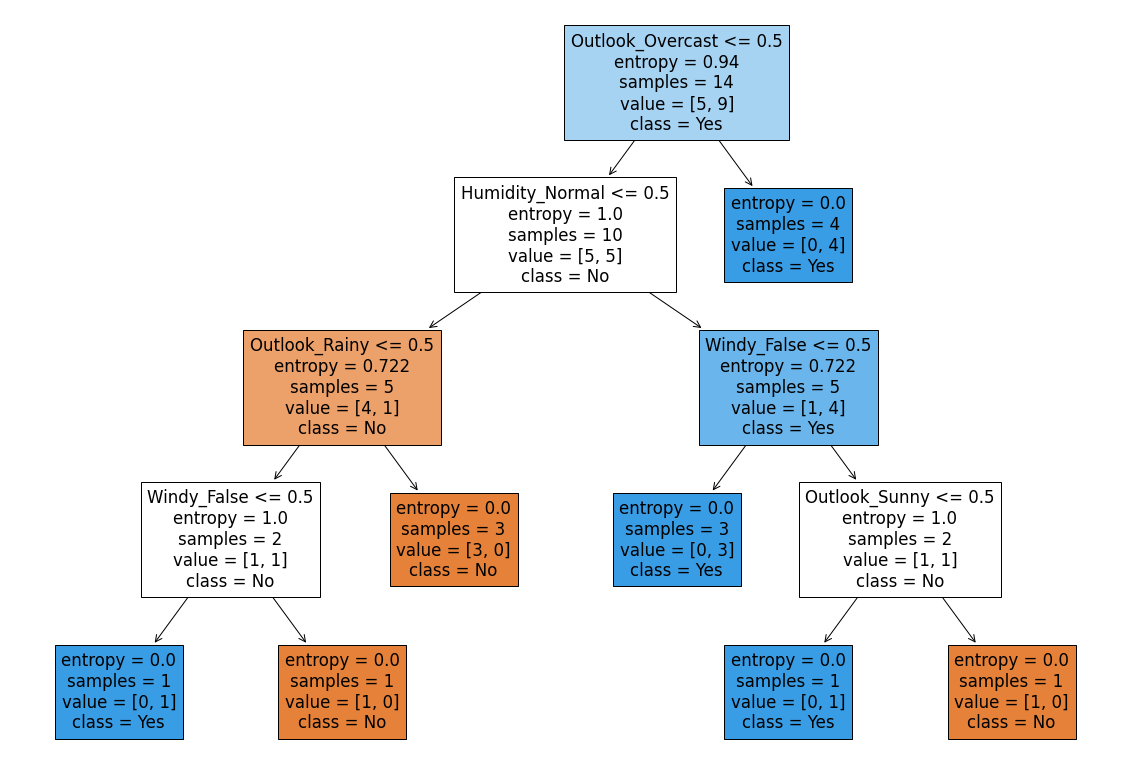

In [19]:
plt.figure(figsize = (20, 14))
plot_tree(classifier, filled = True, feature_names = encoder.get_feature_names(X.columns), class_names = list(y.unique()))
plt.show()